1.  Відкрити та зчитати дані з наданого файлу.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, balanced_accuracy_score, roc_auc_score,
    precision_recall_curve, roc_curve
)
import random

df = pd.read_csv("models.csv")
df

,GT,Model_1_0,Model_2_1
0,1,0.014745,0.996526
1,0,0.999735,0.003289
2,0,0.999786,0.125449
3,0,0.999695,0.000858
4,1,0.022115,0.786606
...,...,...,...
4395,0,0.999753,0.125449
4396,0,0.999777,0.125449
4397,0,0.909023,0.159557
4398,0,0.999737,0.125999


2.  Визначити  збалансованість  набору  даних.  Вивести  кількість  об’єктів 
кожного класу

In [219]:
print(df["GT"].value_counts())

GT
1    2200
0    2200
Name: count, dtype: int64


3. Для зчитаного набору даних виконати наступні дії: 

a.  Обчислити  всі  метрики  ( Accuracy,  Precision,  Recall,  F-Scores,  Matthews  Correlation  Coefficient,  Balanced  Accuracy,  Youden’s  J  statistics, Area Under Curve for Precision-Recall Curve, Area Under Curve for Receiver Operation Curve) для кожної моделі при різних значеннях порогу класифікатора ( крок зміни порогу обрати самостійно).

In [220]:
def compute_metrics(y_true, y_probs, thresholds):
    results = []
    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        precision, recall, _ = precision_recall_curve(y_true, y_probs)
        fpr, tpr, _ = roc_curve(y_true, y_probs)
        tn = ((y_pred == 0) & (y_true == 0)).sum()
        fp = ((y_pred == 1) & (y_true == 0)).sum()
        tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
        metrics = {
            "Threshold": t,
            "Accuracy": accuracy_score(y_true, y_pred),
            "Precision": precision_score(y_true, y_pred, zero_division=0),
            "Recall": recall_score(y_true, y_pred),
            "F1 Score": f1_score(y_true, y_pred),
            "Matthews Corr": matthews_corrcoef(y_true, y_pred),
            "Balanced Accuracy": balanced_accuracy_score(y_true, y_pred),
            "Youden J": recall_score(y_true, y_pred) + tnr - 1,
            "PR AUC": np.trapezoid(precision, recall),
            "ROC AUC": np.trapezoid(tpr, fpr)

        }
        results.append(metrics)
    return pd.DataFrame(results)

thresholds = np.arange(0, 1, 0.1)

df_metrics_1 = compute_metrics(df["GT"], df["Model_1_0"], thresholds)
df_metrics_2 = compute_metrics(df["GT"], df["Model_2_1"], thresholds)

print("Метрики для моделі 1:")
display(df_metrics_1.head())

print("Метрики для моделі 2:")
display(df_metrics_2.head())

Метрики для моделі 1:


,Threshold,Accuracy,Precision,Recall,F1 Score,Matthews Corr,Balanced Accuracy,Youden J,PR AUC,ROC AUC
0,0.0,0.500000,0.500000,1.000000,0.666667,0.000000,0.500000,0.000000,-0.307309,0.003215
1,0.1,0.024091,0.037544,0.038636,0.038082,-0.952221,0.024091,-0.951818,-0.307309,0.003215
2,0.2,0.013636,0.016275,0.016364,0.016319,-0.972742,0.013636,-0.972727,-0.307309,0.003215
3,0.3,0.009773,0.006407,0.006364,0.006385,-0.980477,0.009773,-0.980455,-0.307309,0.003215
4,0.4,0.009545,0.005046,0.005000,0.005023,-0.980950,0.009545,-0.980909,-0.307309,0.003215


Метрики для моделі 2:


,Threshold,Accuracy,Precision,Recall,F1 Score,Matthews Corr,Balanced Accuracy,Youden J,PR AUC,ROC AUC
0,0.0,0.500000,0.500000,1.000000,0.666667,0.000000,0.500000,0.000000,-0.996758,0.997038
1,0.1,0.812273,0.727785,0.997727,0.841641,0.672517,0.812273,0.624545,-0.996758,0.997038
2,0.2,0.991136,0.986931,0.995455,0.991174,0.982309,0.991136,0.982273,-0.996758,0.997038
3,0.3,0.991136,0.986931,0.995455,0.991174,0.982309,0.991136,0.982273,-0.996758,0.997038
4,0.4,0.991136,0.987370,0.995000,0.991170,0.982302,0.991136,0.982273,-0.996758,0.997038


b.  Збудувати на одному графіку в одній координатній системі (величина  порогу;  значення  метрики)  графіки  усіх  обчислених метрик, відмітивши певним чином максимальне значення кожної з них.

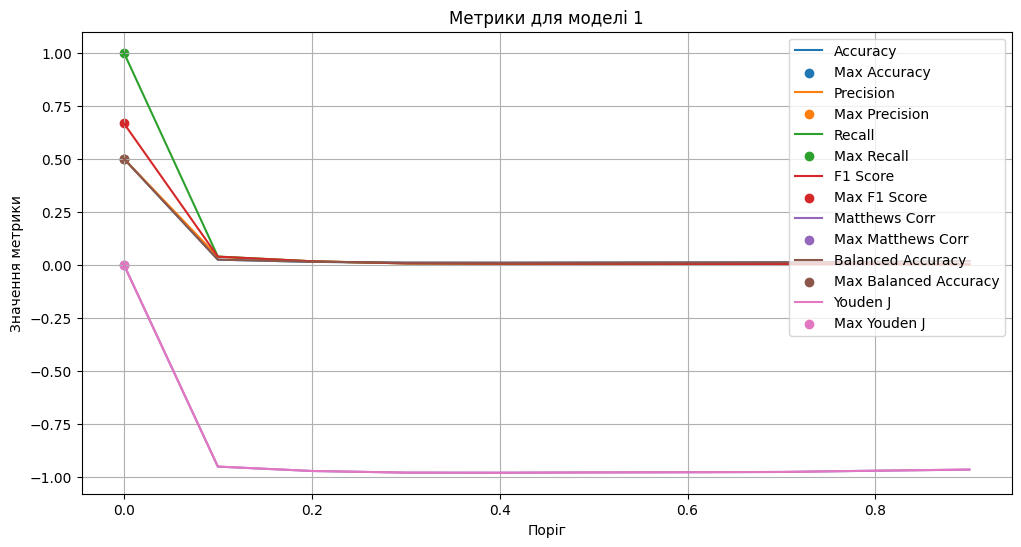

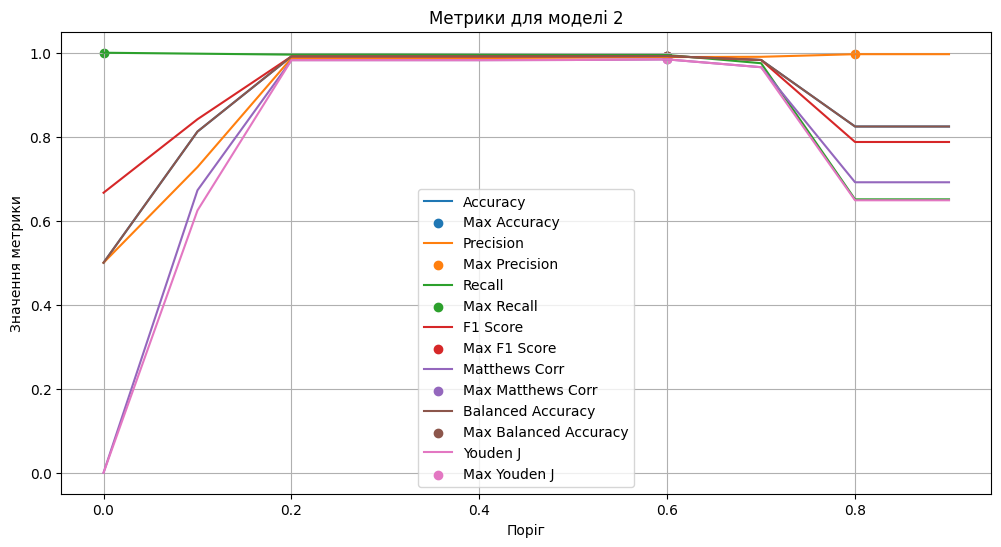

In [221]:
def plot_metrics(metrics_df, model_name):
    plt.figure(figsize=(12, 6))

    for metric in ["Accuracy", "Precision", "Recall", "F1 Score", "Matthews Corr", "Balanced Accuracy", "Youden J"]:
        plt.plot(metrics_df["Threshold"], metrics_df[metric], label=metric)
        max_idx = metrics_df[metric].idxmax()
        plt.scatter(metrics_df["Threshold"].iloc[max_idx], metrics_df[metric].iloc[max_idx], marker='o', label=f'Max {metric}')
    
    plt.xlabel("Поріг")
    plt.ylabel("Значення метрики")
    plt.title(f"Метрики для {model_name}")
    plt.legend()
    plt.grid()
    plt.show()


plot_metrics(df_metrics_1, "моделі 1")
plot_metrics(df_metrics_2, "моделі 2")

c.  Збудувати в координатах ( значення оцінки класифікаторів; кількість  об’єктів  кожного  класу)  окремі  для  кожного  класу графіки  кількості  об’єктів  та  відмітити  вертикальними  лініями оптимальні пороги відсічення для кожної метрики.

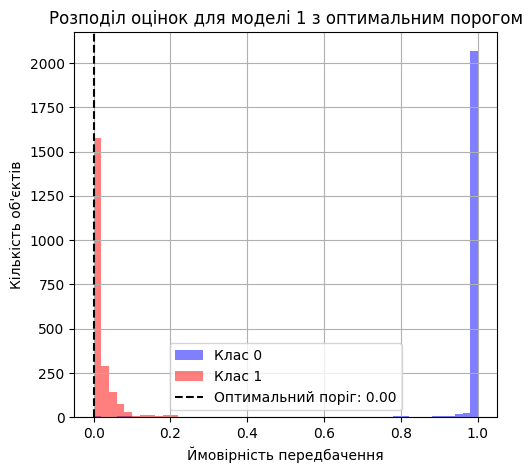

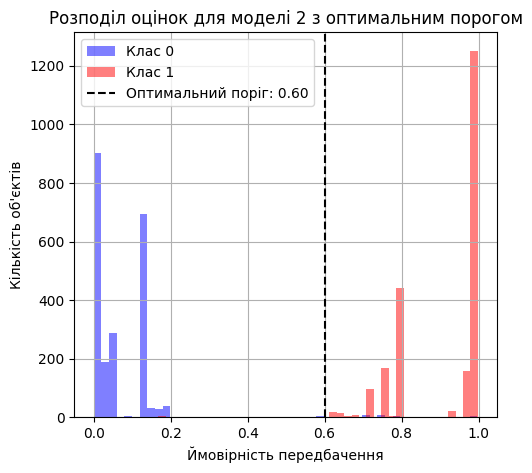

In [222]:
def plot_prediction_distribution(model_probs, model_name, optimal_threshold, subplot_position):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, subplot_position)
    plt.hist(df[df["GT"] == 0][model_probs], bins=50, alpha=0.5, label="Клас 0", color="blue")
    plt.hist(df[df["GT"] == 1][model_probs], bins=50, alpha=0.5, label="Клас 1", color="red")
    plt.axvline(optimal_threshold, color="black", linestyle="dashed", label=f"Оптимальний поріг: {optimal_threshold:.2f}")
    plt.xlabel(f"Ймовірність передбачення")
    plt.ylabel("Кількість об'єктів")
    plt.title(f"Розподіл оцінок для {model_name} з оптимальним порогом")
    plt.legend()
    plt.grid()

optimal_thresholds = {
    "Model_1_0": df_metrics_1.loc[df_metrics_1["F1 Score"].idxmax(), "Threshold"],
    "Model_2_1": df_metrics_2.loc[df_metrics_2["F1 Score"].idxmax(), "Threshold"]
}

plot_prediction_distribution("Model_1_0", "моделі 1", optimal_thresholds["Model_1_0"], 1)
plot_prediction_distribution("Model_2_1", "моделі 2", optimal_thresholds["Model_2_1"], 2)

plt.show()

d.  Збудувати  для  кожного  класифікатору  PR-криву  та  ROC-криву, показавши графічно на них значення оптимального порогу.

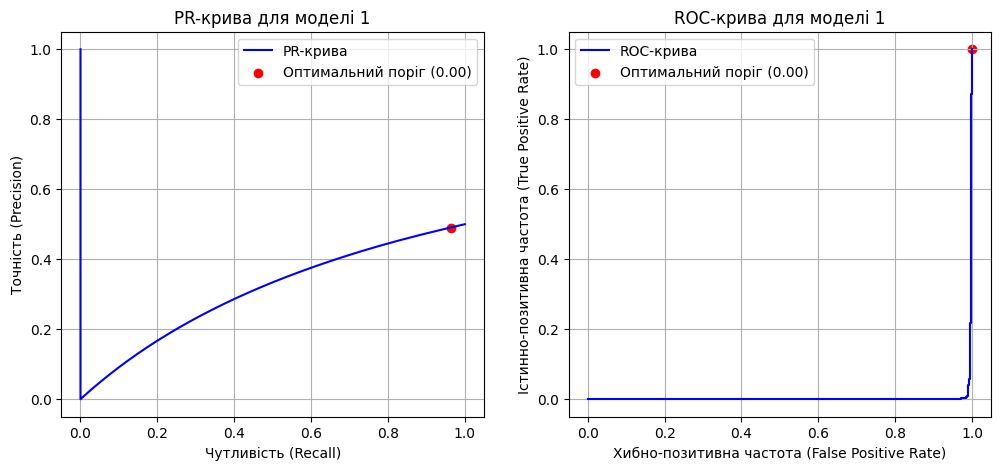

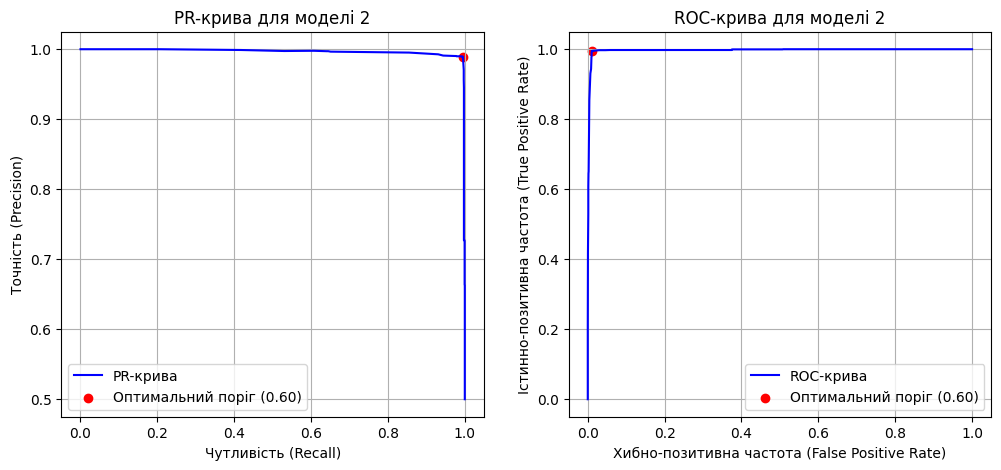

In [223]:
def plot_pr_roc_curves(y_true, y_probs, model_name, optimal_threshold):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_probs)

    opt_idx = (np.abs(thresholds_roc - optimal_threshold)).argmin()
    opt_prec, opt_rec = precision_recall_curve(y_true, y_probs)[:2]
    opt_prec, opt_rec = opt_prec[opt_idx], opt_rec[opt_idx]
    opt_fpr, opt_tpr = fpr[opt_idx], tpr[opt_idx]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, label="PR-крива", color="blue")
    plt.scatter(opt_rec, opt_prec, color="red", label=f"Оптимальний поріг ({optimal_threshold:.2f})")
    plt.xlabel("Чутливість (Recall)")
    plt.ylabel("Точність (Precision)")
    plt.title(f"PR-крива для {model_name}")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label="ROC-крива", color="blue")
    plt.scatter(opt_fpr, opt_tpr, color="red", label=f"Оптимальний поріг ({optimal_threshold:.2f})")
    plt.xlabel("Хибно-позитивна частота (False Positive Rate)")
    plt.ylabel("Істинно-позитивна частота (True Positive Rate)")
    plt.title(f"ROC-крива для {model_name}")
    plt.legend()
    plt.grid()

    plt.show()

plot_pr_roc_curves(df["GT"], df["Model_1_0"], "моделі 1", optimal_thresholds["Model_1_0"])
plot_pr_roc_curves(df["GT"], df["Model_2_1"], "моделі 2", optimal_thresholds["Model_2_1"])


4.  Зробити висновки щодо якості моделей, визначити кращу модель. 

Модель 1: погано працює при будь-якому порозі, не здатна коректно розрізняти класи, що підтверджується низькими метриками. Також завжди передбачає один клас, що пояснює її погані метрики, не вчиться розпізнавати інші класи.

Модель 2: має чудові результати за всіма метриками, добре справляється з класифікацією при оптимальному порозі (0.59), добре розрізняє обидва класи, розподіл ймовірностей правильний, оптимальний поріг (0.59) дає хороший баланс між Precision і Recall.

Очевидно, що модель 2 є кращою моделлю

5.  Створити новий набір даних, прибравши з початкового набору   (50 + 10К)% об’єктів класу 1, вибраних випадковим чином. Параметр К  представляє собою залишок від ділення місяця народження студента на чотири  та має  визначатися  в  програмі  на  основі  дати  народження студента,  яка  задана  в  програмі  у  вигляді  текстової  змінної  формату ‘DD-MM’. 

In [224]:
birth_date = "06-08"
month = int(birth_date.split("-")[1])
K = month % 4
percentage_to_remove = 50 + 10 * K

num_class_1 = df[df["GT"] == 1].shape[0]
num_to_remove = int((percentage_to_remove / 100) * num_class_1)

df_class_1 = df[df["GT"] == 1].sample(frac=1, random_state=42)
df_class_1_reduced = df_class_1.iloc[num_to_remove:]

df_class_0 = df[df["GT"] == 0]
df_new = pd.concat([df_class_0, df_class_1_reduced]).sample(frac=1, random_state=42)

6.  Вивести  відсоток  видалених  об’єктів  класу  1  та  кількість  елементів кожного класу після видалення.

In [225]:
new_class_counts = df_new["GT"].value_counts()
print(f"Видалено {percentage_to_remove}% об'єктів класу 1 ({num_to_remove} записів).")
print(f"Кількість класів після видалення:")
display(new_class_counts)

Видалено 50% об'єктів класу 1 (1100 записів).
Кількість класів після видалення:


GT
0    2200
1    1100
Name: count, dtype: int64

7.  Виконати дії п.3 для нового набору даних.

Метрики для моделі 1 (оновлений датасет):


,Threshold,Accuracy,Precision,Recall,F1 Score,Matthews Corr,Balanced Accuracy,Youden J,PR AUC,ROC AUC
0,0.0,0.333333,0.333333,1.000000,0.500000,0.000000,0.500000,0.000000,-0.189388,0.003337
1,0.1,0.018788,0.018468,0.037273,0.024699,-0.957624,0.023409,-0.953182,-0.189388,0.003337
2,0.2,0.013333,0.009107,0.018182,0.012136,-0.970031,0.014545,-0.970909,-0.189388,0.003337
3,0.3,0.011515,0.004128,0.008182,0.005488,-0.974298,0.010682,-0.978636,-0.189388,0.003337
4,0.4,0.011212,0.002759,0.005455,0.003664,-0.975055,0.009773,-0.980455,-0.189388,0.003337


Метрики для моделі 2 (оновлений датасет):


,Threshold,Accuracy,Precision,Recall,F1 Score,Matthews Corr,Balanced Accuracy,Youden J,PR AUC,ROC AUC
0,0.0,0.333333,0.333333,1.000000,0.500000,0.000000,0.500000,0.000000,-0.993502,0.996764
1,0.1,0.750303,0.571950,0.997273,0.726972,0.596317,0.812045,0.624091,-0.993502,0.996764
2,0.2,0.989394,0.974176,0.994545,0.984256,0.976379,0.990682,0.981364,-0.993502,0.996764
3,0.3,0.989394,0.974176,0.994545,0.984256,0.976379,0.990682,0.981364,-0.993502,0.996764
4,0.4,0.989697,0.975045,0.994545,0.984698,0.977042,0.990909,0.981818,-0.993502,0.996764


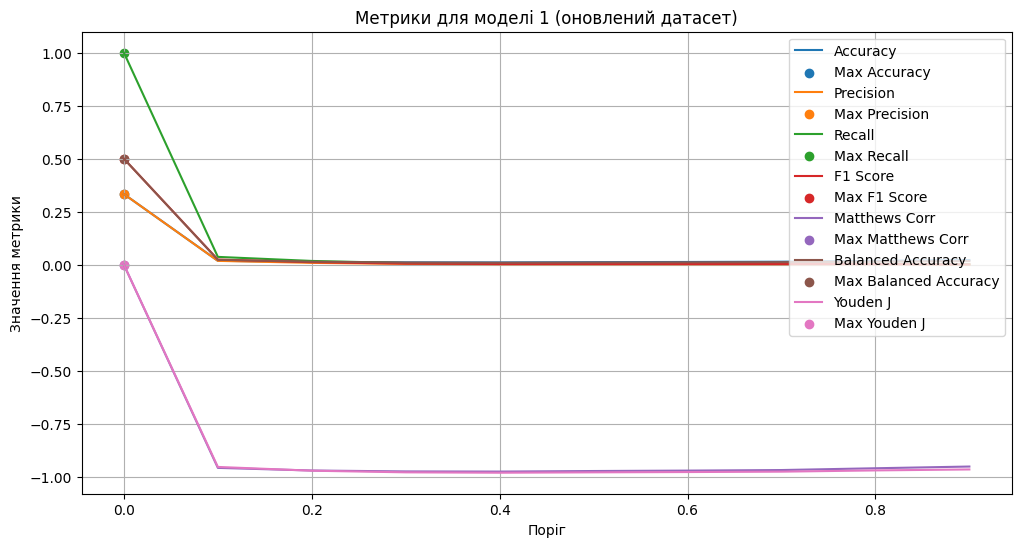

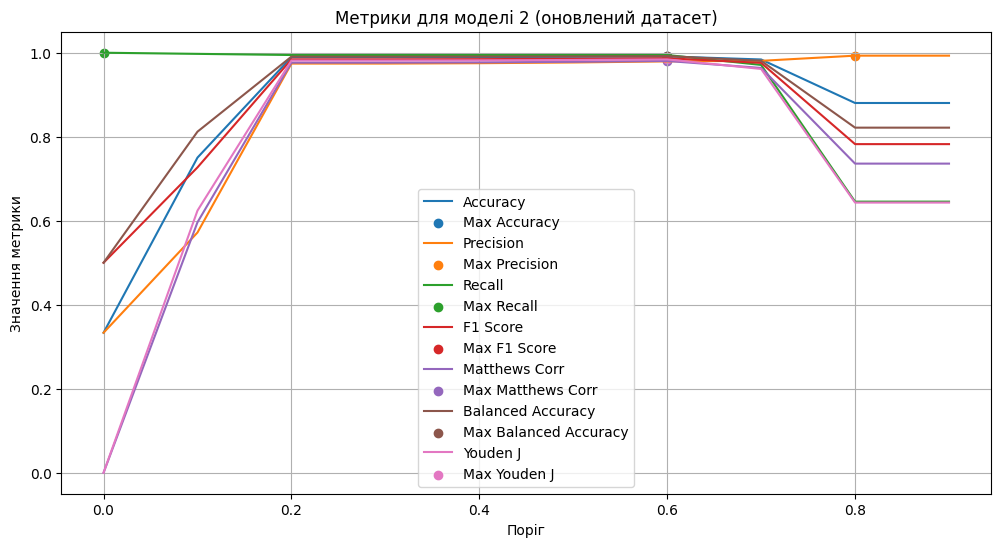

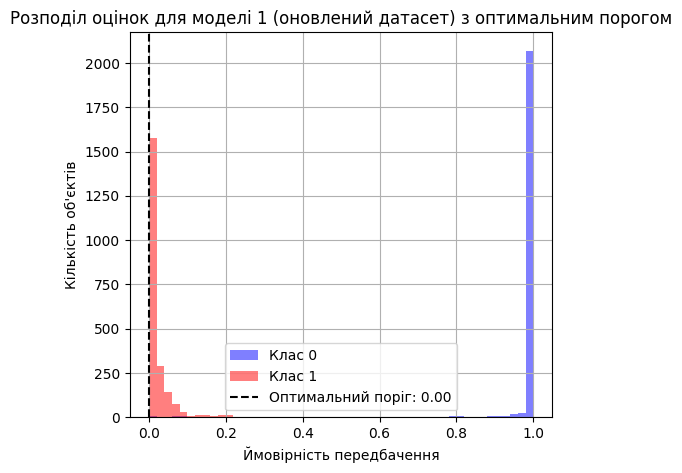

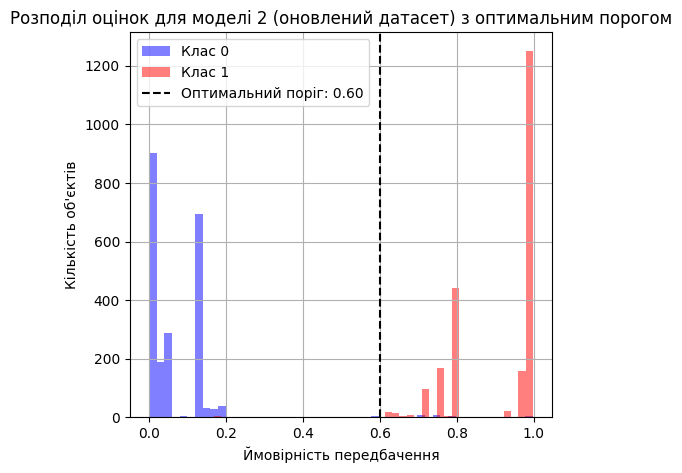

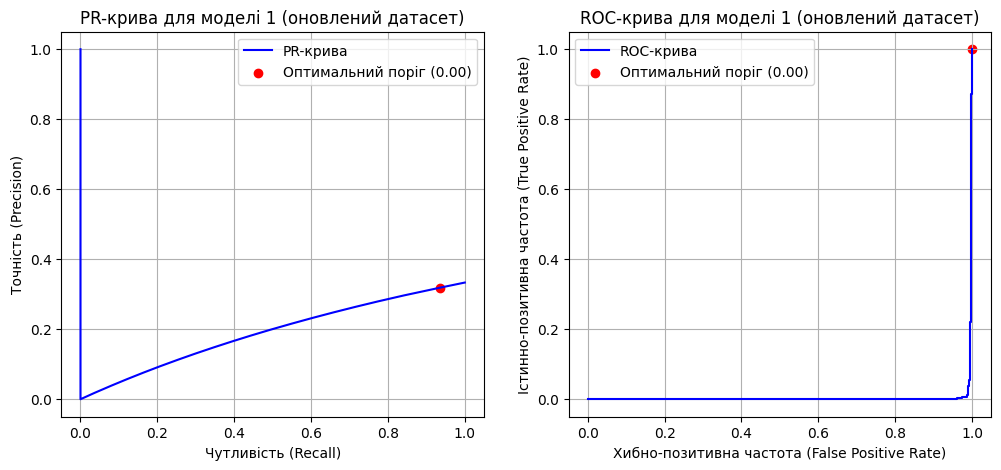

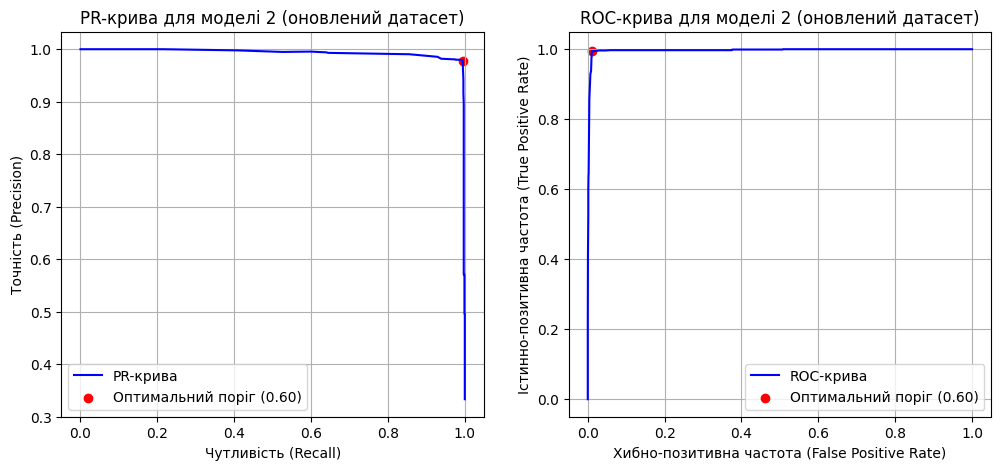

In [226]:
df_new_metrics_1 = compute_metrics(df_new["GT"], df_new["Model_1_0"], thresholds)
df_new_metrics_2 = compute_metrics(df_new["GT"], df_new["Model_2_1"], thresholds)

print("Метрики для моделі 1 (оновлений датасет):")
display(df_new_metrics_1.head())

print("Метрики для моделі 2 (оновлений датасет):")
display(df_new_metrics_2.head())

plot_metrics(df_new_metrics_1, "моделі 1 (оновлений датасет)")
plot_metrics(df_new_metrics_2, "моделі 2 (оновлений датасет)")

optimal_new_thresholds = {
    "Model_1_0": df_new_metrics_1.loc[df_new_metrics_1["F1 Score"].idxmax(), "Threshold"],
    "Model_2_1": df_new_metrics_2.loc[df_new_metrics_2["F1 Score"].idxmax(), "Threshold"]
}

plot_prediction_distribution("Model_1_0", "моделі 1 (оновлений датасет)", optimal_new_thresholds["Model_1_0"], 1)
plot_prediction_distribution("Model_2_1", "моделі 2 (оновлений датасет)", optimal_new_thresholds["Model_2_1"], 2)
plt.show()

plot_pr_roc_curves(df_new["GT"], df_new["Model_1_0"], "моделі 1 (оновлений датасет)", optimal_new_thresholds["Model_1_0"])
plot_pr_roc_curves(df_new["GT"], df_new["Model_2_1"], "моделі 2 (оновлений датасет)", optimal_new_thresholds["Model_2_1"])

8.  Визначити кращу модель. 

Модель 2 є однозначно кращою, оскільки навіть після оновлення датасету вона продовжує зберігати хорошу продуктивність та точність у розпізнаванні класів. Модель 1 не може ефективно розділяти класи та фактично є некорисною навіть після оновлення датасету.

9.  Пояснити вплив незбалансованості набору даних на прийняте рішення. 

Незбалансованість призводить до зміщення навчання моделі. Це помітно в моделі 1, яка після оновлення датасету фактично не може визначати клас 1, встановлюючи оптимальний поріг на рівні 0.00

Також до зміни оптимального порогу після оновлення. В моделі 1 оптимальний поріг залишився 0.00, що означає, що модель фактично не може визначати клас 1. Це підтверджує, що вона не навчилася правильно розрізняти класи через незбалансованість. В моделі 2 оптимальний поріг залишився на рівні 0.60, що говорить про її стійкість до змін у розподілі даних.

Також є вплив на метрики оцінки моделі. Accuracy може вводити в оману, оскільки високий результат можливий навіть тоді, коли модель просто передбачає переважаючий клас.
Precision, Recall та F1 Score є більш корисними метриками в умовах незбалансованих даних, оскільки вони оцінюють, наскільки добре модель передбачає менш чисельний клас.